In [1]:
import pandas as pd

In [2]:
X_train=pd.read_csv("X_train_smote.csv")
X_train.shape

(182, 12)

In [3]:
X_test=pd.read_csv("X_test_rfe.csv")
X_test.shape

(35, 12)

In [4]:
y_train=pd.read_csv("y_train_smote.csv")
y_train.shape

(182, 1)

In [5]:
y_test=pd.read_csv("y_test.csv")
y_test.shape

(35, 1)

In [6]:
import seaborn as sns

In [7]:
sum(y_train['Class']=='Toxic')

91

In [8]:
sum(y_train['Class']=='NonToxic')

91

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [10]:
tsne = TSNE(n_components=2, random_state=42)

In [11]:
X_tsne = tsne.fit_transform(X_train)

C:\Users\KORISNIK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\KORISNIK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


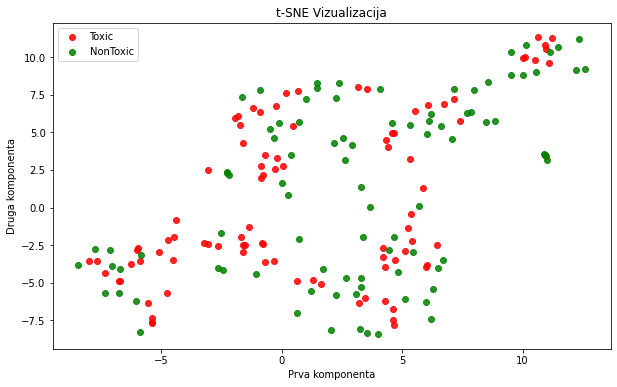

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[y_train['Class']=='Toxic', 0], X_tsne[y_train['Class']=='Toxic', 1], label='Toxic', alpha=0.85,color='red')
plt.scatter(X_tsne[y_train['Class']=='NonToxic', 0], X_tsne[y_train['Class']=='NonToxic', 1], label='NonToxic', alpha=0.85,color='green')
plt.legend()
plt.title('t-SNE Vizualizacija')
plt.xlabel('Prva komponenta')
plt.ylabel('Druga komponenta')
plt.savefig('Vizualizacija_posle_SMOTE.png')
plt.show()

In [426]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score

In [427]:
clf = DecisionTreeClassifier()

In [436]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [437]:
y_pred = clf.predict(X_test)


In [438]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Tačnost modela: {accuracy:.2f}")

Tačnost modela: 0.63


In [439]:
f1_toxic = f1_score(y_test, y_pred, pos_label="Toxic")
f1_nontoxic = f1_score(y_test, y_pred, pos_label="NonToxic")

print(f"F1 skor za toxic: {f1_toxic:.2f}")
print(f"F1 skor za nontoxic: {f1_nontoxic:.2f}")

F1 skor za toxic: 0.43
F1 skor za nontoxic: 0.72


In [440]:
from sklearn.model_selection import GridSearchCV


In [441]:
param_grid = {
    'max_depth': [4,5,6,7,8,9,10,13],
    'min_samples_split': [2,3,4,5,6,7,8],
    'min_samples_leaf': [1,3,5,7,9,11]
}

In [448]:
num_folds = 4

# Kreirajte GridSearchCV objekat
grid_search = GridSearchCV(clf, param_grid, cv=num_folds, scoring='accuracy')

# Izvršite pretragu po rešetki
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 13],
                         'min_samples_leaf': [1, 3, 5, 7, 9, 11],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8]},
             scoring='accuracy')

In [449]:
# Ispisivanje najboljih hiperparametara
print("Najbolji hiperparametri:")
print(grid_search.best_params_)

# Ispisivanje najbolje postignute tačnosti
print("Najbolja tačnost:")
print(grid_search.best_score_)

Najbolji hiperparametri:
{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
Najbolja tačnost:
0.758574879227053


In [450]:
y_pred=grid_search.best_estimator_.predict(X_test)

In [451]:
f1_toxic = f1_score(y_test, y_pred, pos_label="Toxic")
f1_nontoxic = f1_score(y_test, y_pred, pos_label="NonToxic")
acc=accuracy_score(y_test,y_pred)

print(f"F1 skor za toxic: {f1_toxic:.2f}")
print(f"F1 skor za nontoxic: {f1_nontoxic:.2f}")
print(f"Tacnost: {acc:.2f}")

F1 skor za toxic: 0.40
F1 skor za nontoxic: 0.76
Tacnost: 0.66


In [481]:
model=DecisionTreeClassifier(max_depth=13,min_samples_leaf=1,min_samples_split=2)
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)


print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))
f1_toxic = f1_score(y_test, y_pred_test, pos_label="Toxic")
f1_nontoxic = f1_score(y_test, y_pred_test, pos_label="NonToxic")
print(f1_nontoxic)
print(f1_toxic)

1.0
0.6285714285714286
0.723404255319149
0.43478260869565216


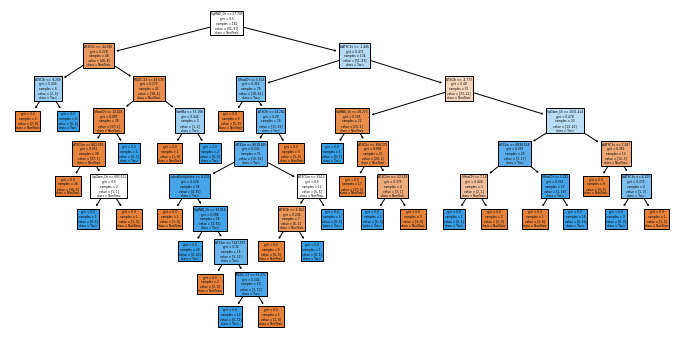

In [482]:
from sklearn.tree import  plot_tree
plt.figure(figsize=(12, 6))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=['NonToxic','Toxic'])
plt.savefig('tree_pre.png')
plt.show()

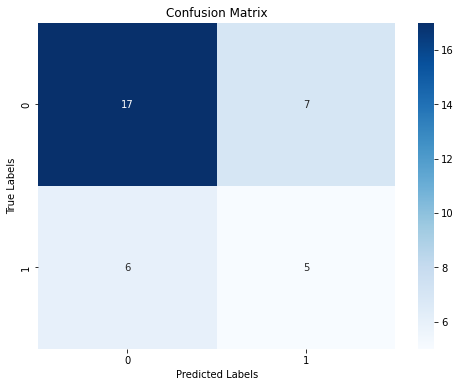

In [483]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confusion = confusion_matrix(y_test, y_pred_test)

# Vizualizacija matrice konfuzije koristeći seaborn biblioteku
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('conf_pre.png')
plt.show()

In [172]:
confusion

array([[16,  8],
       [ 8,  3]], dtype=int64)

In [474]:
#REGULARIZACIJA
param_grid = {
    'max_depth': [4,5,6,7],
    'min_samples_leaf': [7,9,11],
    'min_samples_split': [7,8],
    'criterion': ['gini','entropy']
}
#553 0.89 0.68

In [475]:
num_folds = 4

grid_search = GridSearchCV(clf, param_grid, cv=num_folds, scoring='accuracy')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7],
                         'min_samples_leaf': [7, 9, 11],
                         'min_samples_split': [7, 8]},
             scoring='accuracy')

In [476]:
# Ispisivanje najboljih hiperparametara
print("Najbolji hiperparametri:")
print(grid_search.best_params_)

# Ispisivanje najbolje postignute tačnosti
print("Najbolja tačnost:")
print(grid_search.best_score_)

Najbolji hiperparametri:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 7}
Najbolja tačnost:
0.7582125603864736


In [477]:
y_pred=grid_search.best_estimator_.predict(X_test)

In [499]:
model=DecisionTreeClassifier(max_depth=5,min_samples_leaf=7,min_samples_split=7)
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)


print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))
f1_toxic = f1_score(y_test, y_pred_test, pos_label="Toxic")
f1_nontoxic = f1_score(y_test, y_pred_test, pos_label="NonToxic")
print(f1_nontoxic)
print(f1_toxic)

0.8516483516483516
0.6571428571428571
0.7391304347826088
0.4999999999999999


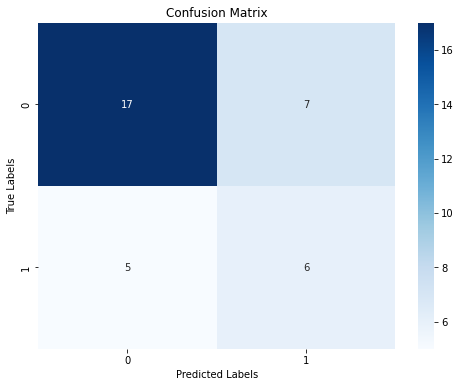

In [500]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confusion = confusion_matrix(y_test, y_pred_test)

# Vizualizacija matrice konfuzije koristeći seaborn biblioteku
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('conf_post.png')
plt.show()

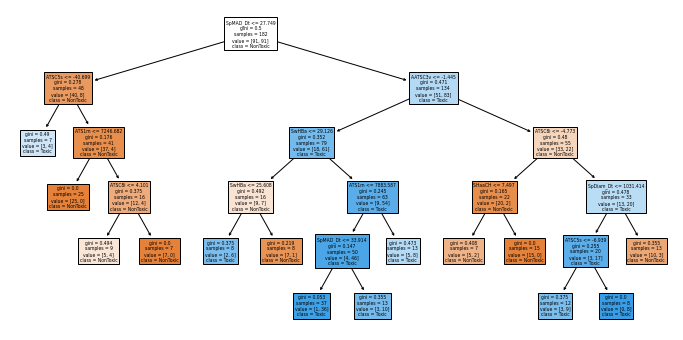

In [501]:
from sklearn.tree import  plot_tree
plt.figure(figsize=(12, 6))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=['NonToxic','Toxic'])
plt.savefig('tree_post.png')
plt.show()

In [497]:
model=DecisionTreeClassifier(max_depth=5,min_samples_leaf=7,min_samples_split=7,max_leaf_nodes=20)
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)


print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))
f1_toxic = f1_score(y_test, y_pred_test, pos_label="Toxic")
f1_nontoxic = f1_score(y_test, y_pred_test, pos_label="NonToxic")
print(f1_nontoxic)
print(f1_toxic)

0.8516483516483516
0.6571428571428571
0.7391304347826088
0.4999999999999999


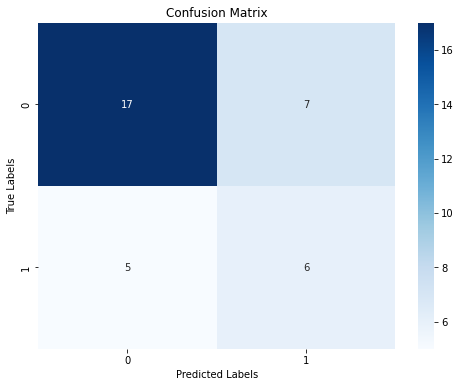

In [498]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confusion = confusion_matrix(y_test, y_pred_test)

# Vizualizacija matrice konfuzije koristeći seaborn biblioteku
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

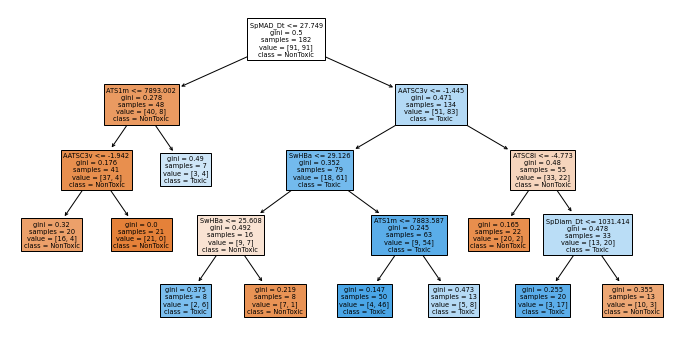

In [486]:
from sklearn.tree import  plot_tree
plt.figure(figsize=(12, 6))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=['NonToxic','Toxic'])

plt.show()

# Decision Tree unbalansed data

In [26]:
X_train=pd.read_csv('C:/Users/KORISNIK/Desktop/za fakultet/ToxicityOfMolecules/data/X_train_rfe.csv')
X_test=pd.read_csv('C:/Users/KORISNIK/Desktop/za fakultet/ToxicityOfMolecules/data/X_test_rfe.csv')
y_train=pd.read_csv('C:/Users/KORISNIK/Desktop/za fakultet/ToxicityOfMolecules/data/y_train.csv')
y_test=pd.read_csv('C:/Users/KORISNIK/Desktop/za fakultet/ToxicityOfMolecules/data/y_test.csv')

In [27]:
param_grid = {
    'max_depth': [4,5,6,7],
    'min_samples_leaf': [7,9,11],
    'min_samples_split': [7,8],
    'criterion': ['gini','entropy']
}

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7],
                         'min_samples_leaf': [7, 9, 11],
                         'min_samples_split': [7, 8]},
             scoring='accuracy')

In [32]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 9, 'min_samples_split': 8}


In [34]:
model=DecisionTreeClassifier(max_depth=4,min_samples_leaf=9,min_samples_split=8,criterion='entropy')
model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)


print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))
f1_toxic = f1_score(y_test, y_pred_test, pos_label="Toxic")
f1_nontoxic = f1_score(y_test, y_pred_test, pos_label="NonToxic")
print(f1_nontoxic)
print(f1_toxic)

0.7867647058823529
0.6857142857142857
0.7999999999999999
0.26666666666666666
